In [48]:
evals = list() 
ae_evals = list()

In [291]:

import utils.common
import evaluation
import importlib
import numpy as np
import time
from models.ConstraintAutoRec import ConstraintAutoRec 
import models.NeuralLogicRec
import tensorflow as tf
import pandas as pd
from models.NeuralLogicRec import item_cf, user_cf, diversity_constraint, Constraint, And, Or, Implies, Forall, Not, Equiv
importlib.reload(utils.common)
importlib.reload(evaluation)
importlib.reload(models.NeuralLogicRec)

import itertools

ml_small = utils.common.ml_small
ml_big = utils.common.movie_lens


In [292]:
constraints = list()
constraints.append(Constraint(weight=0.25, formula=item_cf))
constraints.append(Constraint(weight=1.0, formula=user_cf))
@tf.function
def likes_equiv(model, outputs):
    return Forall(Equiv(outputs['rec'], outputs['likes']))
constraints.append(Constraint(weight=0.8, formula=likes_equiv))
@tf.function
def novelty_constraint(model, outputs):
    return Forall(Implies(outputs['popular'], Not(outputs['rec'])))
constraints.append(Constraint(weight=0.25, formula=novelty_constraint))
constraints.append(Constraint(weight=0.75, formula=diversity_constraint))
constraints

[Constraint(weight=0.25, formula=<tensorflow.python.eager.def_function.Function object at 0x7fa7901b6630>),
 Constraint(weight=1.0, formula=<tensorflow.python.eager.def_function.Function object at 0x7fa78d90db70>),
 Constraint(weight=0.8, formula=<tensorflow.python.eager.def_function.Function object at 0x7fa7a153e208>),
 Constraint(weight=0.25, formula=<tensorflow.python.eager.def_function.Function object at 0x7fa7a153e128>),
 Constraint(weight=0.75, formula=<tensorflow.python.eager.def_function.Function object at 0x7fa7a06783c8>)]

In [110]:
ev = evaluation.Evaluation(ml_small)

In [199]:
nlr_ae = models.NeuralLogicRec.NLR(ml_small['user'], ml_small['dimensions'], mode='ae', name='AE_div20sh', epochs=5, embedding_dim=40, batch_size=24, nr_hidden_layers=3, nr_item_samples = 4096, constraints=constraints)

In [200]:
nlr_ae.train(utils.common.load_dataset(ml_small), ml_small['train']['records'])
ae_evals.append(ev.evaluate_single_thread(nlr_ae))

Epoch #1 Loss at step 349: 0.1923, time: 33.868. Train P@1 0.007 P@5 0.011, Eval P@1 0.000 P@5 0.001
Epoch #2 Loss at step 349: 0.1392, time: 29.257. Train P@1 0.146 P@5 0.139, Eval P@1 0.007 P@5 0.007
Epoch #3 Loss at step 349: 0.1233, time: 29.263. Train P@1 0.201 P@5 0.246, Eval P@1 0.007 P@5 0.014
Epoch #4 Loss at step 349: 0.1183, time: 29.085. Train P@1 0.306 P@5 0.301, Eval P@1 0.014 P@5 0.019
Epoch #5 Loss at step 349: 0.1148, time: 29.381. Train P@1 0.319 P@5 0.306, Eval P@1 0.021 P@5 0.011


In [293]:
nlr_new = models.NeuralLogicRec.NLR(ml_small['user'], ml_small['dimensions'], mode='v2', name='V2_N025_D075_out', epochs=10, embedding_dim=40, batch_size=24, nr_hidden_layers=3, nr_item_samples = 10_000, constraints=constraints)

In [294]:
nlr_new.train(utils.common.load_dataset(ml_small), ml_small['train']['records'])
ae_evals.append(ev.evaluate_single_thread(nlr_new))

Epoch #1 Loss at step 349: 0.1701, time: 25.702. Train P@1 0.208 P@5 0.185, Eval P@1 0.000 P@5 0.013
Epoch #2 Loss at step 349: 0.1233, time: 20.000. Train P@1 0.344 P@5 0.387, Eval P@1 0.021 P@5 0.017
Epoch #3 Loss at step 349: 0.1140, time: 19.911. Train P@1 0.573 P@5 0.452, Eval P@1 0.010 P@5 0.029
Epoch #4 Loss at step 349: 0.1090, time: 19.869. Train P@1 0.531 P@5 0.483, Eval P@1 0.010 P@5 0.029
Epoch #5 Loss at step 349: 0.1055, time: 20.075. Train P@1 0.510 P@5 0.440, Eval P@1 0.031 P@5 0.035
Epoch #6 Loss at step 349: 0.1029, time: 20.324. Train P@1 0.500 P@5 0.450, Eval P@1 0.010 P@5 0.021
Epoch #7 Loss at step 349: 0.1008, time: 19.753. Train P@1 0.521 P@5 0.498, Eval P@1 0.031 P@5 0.025
Epoch #8 Loss at step 349: 0.0984, time: 19.713. Train P@1 0.406 P@5 0.387, Eval P@1 0.000 P@5 0.015
Epoch #9 Loss at step 349: 0.0972, time: 19.786. Train P@1 0.406 P@5 0.440, Eval P@1 0.073 P@5 0.023
Epoch #10 Loss at step 349: 0.0953, time: 19.653. Train P@1 0.521 P@5 0.440, Eval P@1 0.031

In [270]:
car = models.ConstraintAutoRec.ConstraintAutoRec(ml_small['dimensions'], epochs=10, novelty_weight=0.75, diversity_weight=0.75, name='ConstraintAutoRec_N075_D075')

In [256]:
car.train(utils.common.load_dataset(ml_small), ml_small['train']['records'])
ae_evals.append(ev.evaluate_single_thread(car))

Epoch 1/10
19/19 [==============================] - 14s 746ms/step - loss: 0.2436 - accuracy: 0.0016
Epoch 2/10
19/19 [==============================] - 0s 17ms/step - loss: 0.2095 - accuracy: 0.0016
Epoch 3/10
19/19 [==============================] - 0s 18ms/step - loss: 0.2078 - accuracy: 0.0082
Epoch 4/10
19/19 [==============================] - 0s 17ms/step - loss: 0.2080 - accuracy: 0.0049
Epoch 5/10
19/19 [==============================] - 0s 17ms/step - loss: 0.2047 - accuracy: 0.0148
Epoch 6/10
19/19 [==============================] - 0s 17ms/step - loss: 0.2002 - accuracy: 0.0066
Epoch 7/10
19/19 [==============================] - 0s 17ms/step - loss: 0.1998 - accuracy: 0.0049
Epoch 8/10
19/19 [==============================] - 0s 17ms/step - loss: 0.1955 - accuracy: 0.0049
Epoch 9/10
19/19 [==============================] - 0s 17ms/step - loss: 0.1968 - accuracy: 0.0164
Epoch 10/10
19/19 [==============================] - 0s 17ms/step - loss: 0.1963 - accuracy: 0.0099


In [295]:
pd.DataFrame(ae_evals)[['precision@5', 'map@1', 'map@5', 'map@10', 'diversity@5', 'diversity@10', 'epc@5', 'epc@10', 'epd@5', 'coverage@1', 'coverage@5', 'coverage@10', 'name']]

,precision@5,map@1,map@5,map@10,diversity@5,diversity@10,epc@5,epc@10,epd@5,coverage@1,coverage@5,coverage@10,name
0,0.118299,0.138016,0.076476,0.063892,0.137715,0.140510,0.839210,0.841383,0.159020,0.017436,0.048261,0.074367,NeuralLogicRec_default
1,0.019470,0.018484,0.010192,0.007359,0.177103,0.181647,0.947601,0.943642,0.171897,0.003757,0.012716,0.022156,NeuralLogicRec_default
2,0.022921,0.028343,0.012471,0.009858,0.154523,0.161315,0.941178,0.942126,0.167028,0.008670,0.028417,0.050284,NeuralLogicRec_default
3,0.154036,0.189772,0.105494,0.083369,0.113045,0.128833,0.633749,0.661420,0.151949,0.003468,0.010789,0.018592,NeuralLogicRec_default
4,0.154405,0.184227,0.105062,0.085711,0.112687,0.126375,0.639377,0.669451,0.150891,0.004142,0.011271,0.020229,NeuralLogicRec_default
5,0.153913,0.182378,0.103851,0.084182,0.114962,0.125772,0.668409,0.694873,0.150068,0.005876,0.016954,0.029959,NeuralLogicRec_default
6,0.158842,0.203943,0.110223,0.087918,0.117859,0.127593,0.661247,0.687662,0.151883,0.004624,0.013679,0.024082,NeuralLogicRec_default
7,0.150339,0.175601,0.100489,0.081072,0.118068,0.129446,0.639319,0.668453,0.153940,0.004239,0.011078,0.022060,NeuralLogicRec_default
8,0.165003,0.199014,0.110928,0.089545,0.115360,0.124318,0.740063,0.760826,0.150171,0.013294,0.043637,0.067527,NeuralLogicRec_default
9,0.169070,0.205176,0.115598,0.092897,0.114370,0.123962,0.714903,0.736431,0.150075,0.011945,0.039881,0.066853,NeuralLogicRec_default


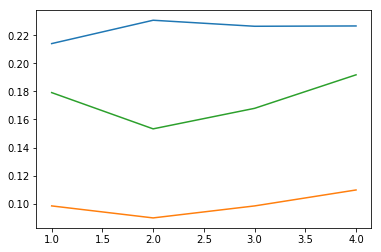

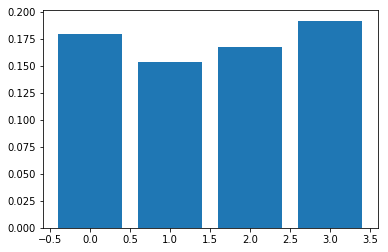

In [175]:
eval_data = pd.DataFrame(ae_evals[-8:])
eval_data = eval_data.sort_values(by='epochs_trained')
import matplotlib.pyplot as plt
plt.plot(eval_data['epochs_trained'], eval_data['diversity@5'])
plt.plot(eval_data['epochs_trained'], eval_data['map@5'])
plt.plot(eval_data['epochs_trained'], eval_data['map@1'])
plt.show()
plt.bar(eval_data.index, eval_data['map@1'])
plt.show()

In [ ]:
np.array([])

In [4]:
tf.version.VERSION

'2.0.0-rc0'

In [20]:
a = tf.convert_to_tensor(np.arange(100).reshape(5,20), dtype=tf.float32)
a = tf.transpose(a)

In [21]:
item_sample_a = tf.random.uniform([10], minval=0, maxval=20, dtype=tf.int32)
item_sample_b = tf.random.uniform([10], minval=0, maxval=20, dtype=tf.int32)
print(item_sample_a)
print(item_sample_b)

tf.Tensor([13  8  2 12  7  6 17 15 15  2], shape=(10,), dtype=int32)
tf.Tensor([ 2 16 11  6  8 17  6  7  4 19], shape=(10,), dtype=int32)


In [22]:
x = tf.nn.embedding_lookup(a, item_sample_a)
y = tf.nn.embedding_lookup(a, item_sample_b)

In [23]:
tf.keras.losses.cosine_similarity(x, y,axis=-1)

<tf.Tensor: id=97, shape=(10,), dtype=float32, numpy=
array([0.9947558 , 0.9979024 , 0.9962775 , 0.99858963, 0.9999572 ,
       0.9958922 , 0.9958922 , 0.9977732 , 0.9953644 , 0.9894124 ],
      dtype=float32)>